In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/climate_change.csv')

In [ ]:
df = df.drop(['Year', 'Month', 'MEI'], axis=1)
df.dropna()
df.reset_index(inplace=True, drop=True)
df = df[df['Temp']>0]
df

,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...
303,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df.describe()

,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,364.550989,1755.208763,312.897597,254.116131,504.614428,1366.095755,0.014947,0.284233
std,12.265855,42.724692,5.110859,17.937581,52.091239,0.403061,0.027688,0.158969
min,340.170000,1631.350000,303.677000,191.324000,350.113000,1365.426100,0.001600,0.001000
25%,354.570000,1731.925000,308.753500,248.542500,485.488500,1365.727350,0.002700,0.160500
50%,364.090000,1768.270000,312.519000,259.472000,532.311000,1366.030400,0.005300,0.266000
75%,374.380000,1788.160000,317.251000,266.912000,540.974500,1366.403550,0.010450,0.418000
max,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


Text(0.5, 1.0, 'Correlation between Variables')

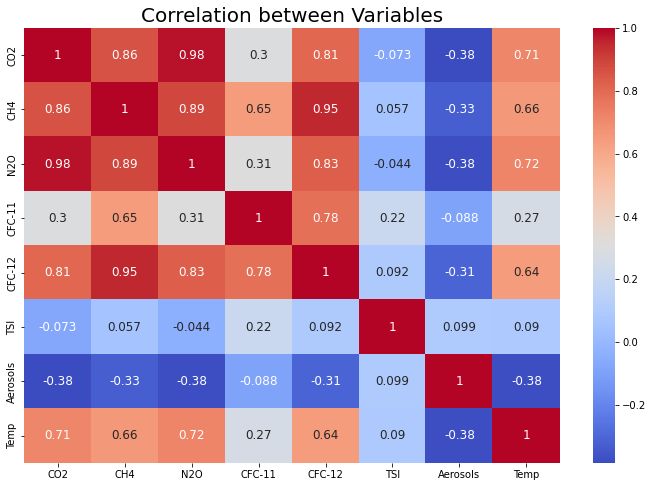

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12,8))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', annot_kws={'size':12}) # or greys, coolwarm
ax.set_title('Correlation between Variables', size= 20)

In [ ]:
x = df[df.columns[df.columns != 'Temp']]
y = df.Temp
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     56.69
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           8.52e-50
Time:                        06:52:06   Log-Likelihood:                 245.79
No. Observations:                 283   AIC:                            -475.6
Df Residuals:                     275   BIC:                            -446.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.6604     21.695     -3.303      0.0

The R squared value is 0.591.

MEI, CFC-11, CFC-12, TSI, and Aerosols are all significant as their p-value is below 0.05.

In [ ]:
x.drop(columns = ['CO2','CH4', 'N2O'],axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     96.78
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.79e-51
Time:                        06:52:10   Log-Likelihood:                 242.83
No. Observations:                 283   AIC:                            -475.7
Df Residuals:                     278   BIC:                            -457.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.5546     21.610     -3.311      0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6655646463741607


In [ ]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,const,0.000000
1,CFC-11,-0.005305
2,CFC-12,0.003182
3,TSI,0.054079
4,Aerosols,-0.674783
